<div class="alert alert-block alert-success">
<b>to do:</b>
    <BR> &#9730; Data description as appendix?
    <BR> &#9730; something with sunburst?
    <BR> &#9730; Add explenations for every step
    <BR> &#9730; Add theoretical background on every model 
</div>

<div id=header class="alert alert-block alert-info">
<b>Final Project For Course 236502001 - כלים טכנולוגיות קוד פתוח למערכות תבוניות </b>
        <BR>Presented By:
        <BR>&emsp;1. Tali Presaizen 304449226
        <BR>&emsp;2. Mor Atiya 123456789
        <BR>&emsp;3. Amir Yorav 123456789
    <BR>Kaggle user: <a href=”https://www.google.com">KKK</a></div>

 # Table of Contents  
1. [Introduction](#Introduction)   
    1. [Data Set Description](#Data-Set-Description)  
    1. [Variable Description](#Variable-Description) 
1. [Imports](#-Imports) 
1. [Exploring The Data](#Exploring-The-Data) 
    1. [Loading](#Loading) 
    1. [Missing Values](#Missing-Values)
    1. [Variable Correlations](#Variable-Correlations)
    1. [Target Variable](#Target-Variable)
    1. [Outliers](#Outliers)
1. [Prepering Data for models](#Prepering-Data-for-models)     
    1. [Encoding](#Encoding)
    1. [Splitting the Data](#Splitting-the-Data)   
    1. [Feature Scaling](#Feature-Scaling) 
1. [Feature Selection](#-Feature-Selection)
    1. [Ridge-Lasso-Elasticnet](#Ridge-Lasso-Elasticnet) 
    1. [Trees](#Trees) 
    1. [PCA](#PCA)
1. [SGD Model](#SGD-Model)     
    1. [Tune Hyper Parameters](#SGD---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#SGD---Evaluating-on-Validation-set)
    1. [Model Submission](#SGD---Model-Submission)     
1. [Random Forest Model](#Random-Forest-Model)     
    1. [Tune Hyper Parameters](#RF---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#RF---Evaluating-on-Validation-set)     
    1. [Model Submission](#RF-Model-Submission) 
1. [Model TTT](#Model-TTT)     
    1. [Tune Hyper Parameters](#TM---Tune-Hyper-Parameters)   
    1. [Evaluating on Validation set](#TM---Evaluating-on-Validation-set)     
    1. [Submission](#TM---Submission) 
1. [Ensemble of the Models](#Ensemble-of-the-Models)     
    1. [Create Ensemble](#Create-Ensemble)    
    1. [Evaluating on Validation set](#Evaluating-on-Validation-set)     
1. [Final Submission](#Conclusions) 
1. [Conclusions](#Conclusions) 
1. [References](#References)    

<table id=Introduction style="width:100%">
<tr><td><h1>Introduction</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

In this project our task is to accurately predict house sales price in Iowa USA based on kaggle "House Prices - Advanced Regression Techniques" competition. 
The assignment will be bases on a big training data with a known sale price and will be tested on a test data with an unknown sale price.
Best prediction should achieve least RMSE on test data.
We will present some methods and approaches based on ML course and Open Source tools that we earned.
Since we didn't study deep learning methods, we are not going to implemet those methods in this project.
The notebook will cover the following steps:
* Data analysis and preperation
* Feature selection and regularization
* Model selection and fitting by tuning hyper-parameters 
* Optimization by ensambling different models 
* Submission and competition score 



### Data Set Description

From the Kaggle competition, we receive two sets of data: 
    a <b>training set</b> with 1,460 observations, 80 features (including ID), and the target SalePrice; 
    and a <b>test set</b> with 1,459 observations, referred to as unseen data, for RMSE calculation of our submission model.
    
Some observations have missing data in some features, which we will take care of carefully in the next section. We will also evaluate our model's performance by dividing the training set into training and <b>validation sets</b> and implementing techniques such as K-Fold CV


### Variable Description

As mentioned before, we have 79 explanatory variables describing (almost) every aspect of residential homes.
The variables include both <b>numerical</b> and <b>categorical</b> types, with different influence on the sale price. 
Some of the features have <b>missing data</b>, which we will handle later (at data cleaning section)

We will next explore those features and their correlation with the target price שnd then choose only the most influent set of them.
But first we read and understand each variable based on our common sense and then will visualize, clean and preprocess the relevant features.

The main features refer to the The house size and condition, living area, basement area, interior, exterior etc.
Also the surroundings like the neigborhood, the street, proximity to conditions etc.
Type of the house: building class, year built, type of the roof etc.
Year and month of sale...

And it also includes: 
overall material and finish quality
and overall condition rating

We will now take a closer look:

#### Categorical features:
* <b>Location and neighborhood</b>: 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2' 
* <b>Type and condition of the outdoors</b>: 'Street', 'Alley', 'PavedDrive', 'LotShape', 'LotConfig', 'LandSlope', 'Foundation', 'MasVnrType'
* <b>Type and style of property</b>: 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'LandContour'
* <b>Interior</b>: 'Utilities','Heating', 'CentralAir', 'Electrical', 
* <b>Basementfeatures</b>: 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
* <b>Garage features</b>: 'GarageFinish', 'GarageType','GarageQual', 'GarageCond'
* <b>Exterier</b>: 'Exterior1st', 'Exterior2nd', 'Fence', 'PoolQC'
* <b>Condition and quality</b>: 'SaleCondition', 'HeatingQC', 'FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond', 'Functional'
* <b>Misc</b>: 'MiscFeature'
* <b>Selling information</b>: 'SaleType'

#### Numerical features:
* <b>Size of property (area in SF)</b>: 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MasVnrArea', 'OpenPorchSF', 'LotArea', 'GarageCars', '3SsnPorch', 'EnclosedPorch',  'ScreenPorch', 'LowQualFinSF'
* <b>Interier</b>: 'Fireplaces', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 
* <b>Condition of the outdoors</b>: 'LotFrontage'
* <b>Age of the property</b>:  'YearBuilt', 'GarageYrBlt', 'YearRemodAdd'
* <b>Evaluated Grade</b>: 'OverallQual', 'OverallCond', 'MiscVal'
* <b>Selling information</b>: 'MoSold', 'YrSold'         
       
### Shall we begin?

<table id=-Imports style="width:100%">
<tr><td><h1>Imports</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table> 

In [1]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# define plt settings
plt.rcParams["font.size"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR

#for some statistics
from scipy.stats import uniform
from scipy import stats
from scipy.stats import norm, skew 
from statistics import mean 

In [2]:
#TP: ignore warnings
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

<table id=Exploring-The-Data style="width:100%">
<tr><td><h1>Exploring The Data</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Loading

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#TP: no need - presented above
#train_data.shape

In [6]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<div class="alert alert-block alert-success">
We see that <strong>test</strong> have all the columns except the <strong>'SalePrice'</strong> which is our target
</div>

In [7]:
# Combining train and test gives more information for setting missing data values
target = train_data['SalePrice']
all_data = pd.concat([train_data.drop('SalePrice',axis=1), test_data])

In [8]:
all_data.shape

(2919, 80)

In [9]:
#TP: Let's get rid of the ID which is just an index
#Save the 'Id' column
train_data_ID = train_data['Id']
test_data_ID = test_data['Id']
all_data_ID = all_data['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)
all_data.drop("Id", axis = 1, inplace = True)

In [10]:
all_data.shape

(2919, 79)

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

---

<div class="alert alert-block alert-success">
Now let's explore the <strong>data</strong> a little bit more <strong>visually</strong>
</div>

 #### visual reports

In [12]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()
#dft = AV.AutoViz("", depVar='SalePrice', dfte=train_data, verbose=2)

##Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
##       verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.

In [13]:
#import sweetviz as sv
#analyze_report = sv.analyze(train_data)
#analyze_report.show_html()

---

In [14]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
# TP: no need 
#all_data.info()

<div class="alert alert-block alert-success">
Above we saw a lot of information, or shall we say <strong>TMI </strong>.
   Next we will make some cleaning and focus only on the relevant
</div>

### Missing Values

In [16]:
# find missing data percentage for each column
def find_missing(df):
    df_na =(df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_df = pd.DataFrame({'Missing Data' :df_na})
    return missing_df

In [17]:
na_data = find_missing(all_data)
na_data

,Missing Data
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

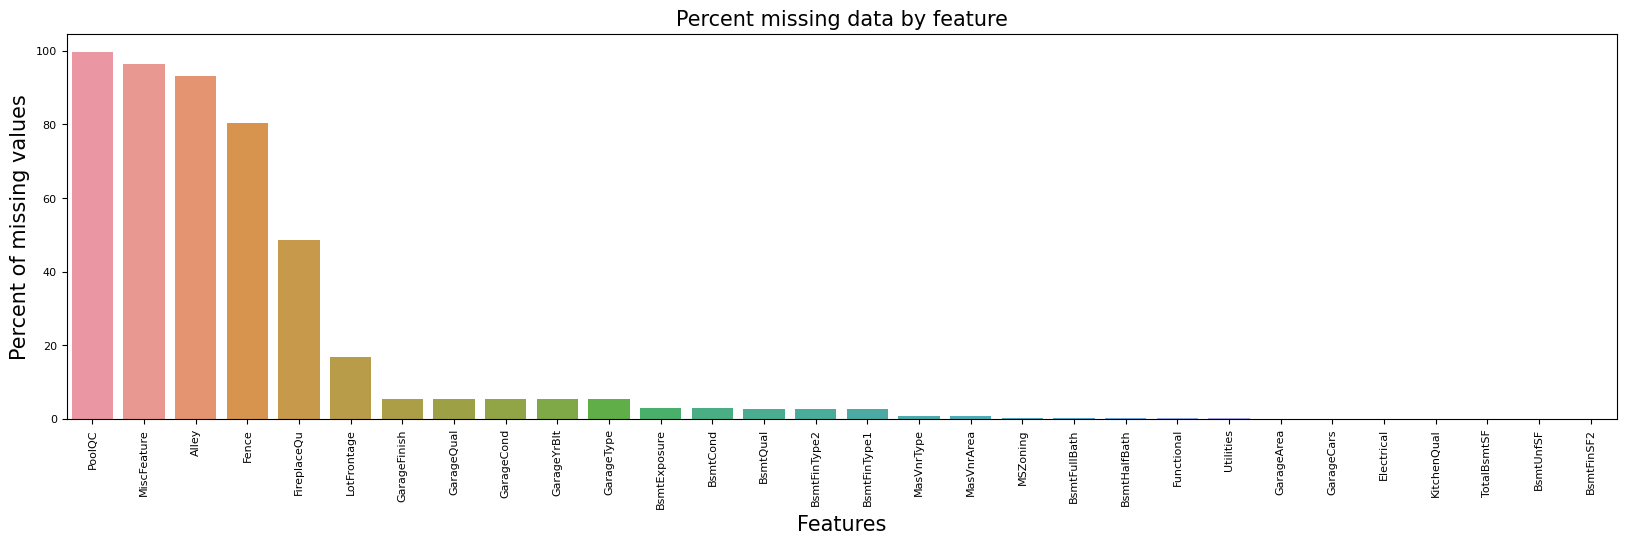

In [18]:
f, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation='90')
sns.barplot(x=na_data.index, y=na_data['Missing Data'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<div class="alert alert-block alert-success">
We can see above that the data have 19 features with nulls, 5 categorical features with high percentage of missing ratio (>47%):
    <BR>* 'PoolQC'
    <BR>* 'MiscFeature'
    <BR>* 'Alley'
    <BR>* 'Fence'
    <BR>* 'FirePlaceQU'
<BR>We assume that they have small contribution to our target price. 
They are candidates to drop or use them to create another more interesting feature
We will check it in the next feature selection part if we realy can remove those features.
</div>

<div class="alert alert-block alert-success"> 
    In some features <b>Nan</b> has a <strong>meaning</strong>.
Lets make a deeper exploration by deviding into categorical and numerical
</div>

In [19]:
all_data2 = all_data.copy()

In [20]:
# check the categorical features with missing values
all_data.select_dtypes('object').loc[:, all_data.isna().sum()>0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [21]:
# TP: MSSubClass is encoded as numerical but is realy a category
all_data2['MSSubClass'] = all_data2['MSSubClass'].astype(str)


### Fill categorical missing values
Fill categorical missing values accordingly:
* If NaN stands for a real value - change it to 'None'
* If NaN is realy a missing data value - change it according to the column mode 

In [22]:
##By overview of data description, we can see that:
 #PoolQC : NA means "No Pool".
    #That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
 #MiscFeature : NA means "no misc feature"
 #Alley :  NA means "no alley access"
 #Fence : NA means "no fence"
 #FireplaceQu : NA means "no fireplace"
 #BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means that there is no basement.
 #GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
 #MSSubClass : NA most likely means No building class. We can replace missing values with None

# Impute using a constant value (for the case where NaN stands for a real value, like 'None')
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MSSubClass']
for column in cols : 
    all_data2[column] = all_data2[column].fillna('None')
    
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
#Functional : data description says NA means typical
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
#SaleType : Fill in again with most frequent which is "WD"
#MasVnrType : NA most likely means no masonry veneer for these houses. None for the type.


# Impute using the column mode (which is the most used type of category)
cols = ['MSZoning', 'Functional', 'Electrical',  'KitchenQual',  'Exterior1st', 'Exterior2nd', 'SaleType',
        'MasVnrType']
for column in cols : 
    all_data2[column] = all_data2[column].fillna(all_data2[column].mode()[0])
        
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data2 = all_data2.drop(['Utilities'], axis=1)

In [23]:
# check only the categorical features with missing values
all_data2.select_dtypes('object').loc[:, all_data2.isna().sum()>0].columns

Index([], dtype='object')

### Fill numerical missing values
Fill numerical missing values accordingly: 
* If NaN stands for a real value - change it to 0
* If NaN is realy a missing data value - make an estimation according to KNN or mean value in the Neighborhood

In [24]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 
#missing values are likely zero for having no basement
#MasVnrArea: NA most likely means no masonry veneer for these houses. We can fill 0 for the area 

cols = ['GarageYrBlt', 'GarageArea', 'GarageCars',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for column in cols:
    all_data2[column] = all_data2[column].fillna(0)

#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data2["LotFrontage"] = all_data2.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In [25]:
missing = find_missing(all_data2)
missing

,Missing Data


<div class="alert alert-block alert-success">
<b>Hurray!</b> No missing data left!
</div>

### Variable Correlations

### Splitting the data 
Since we are going next to explore the correlation, we shall go back to training and forget about test

In [26]:
all_data = all_data2
ntest = test_data.shape[0]+1 #number of rows in test data
train = all_data.iloc[:ntest, :]
test = all_data.iloc[ntest:, :]
train_with_target = train
train_with_target['SalePrice'] = target

print(train.shape, test.shape, train_with_target.shape)

(1460, 79) (1459, 78) (1460, 79)


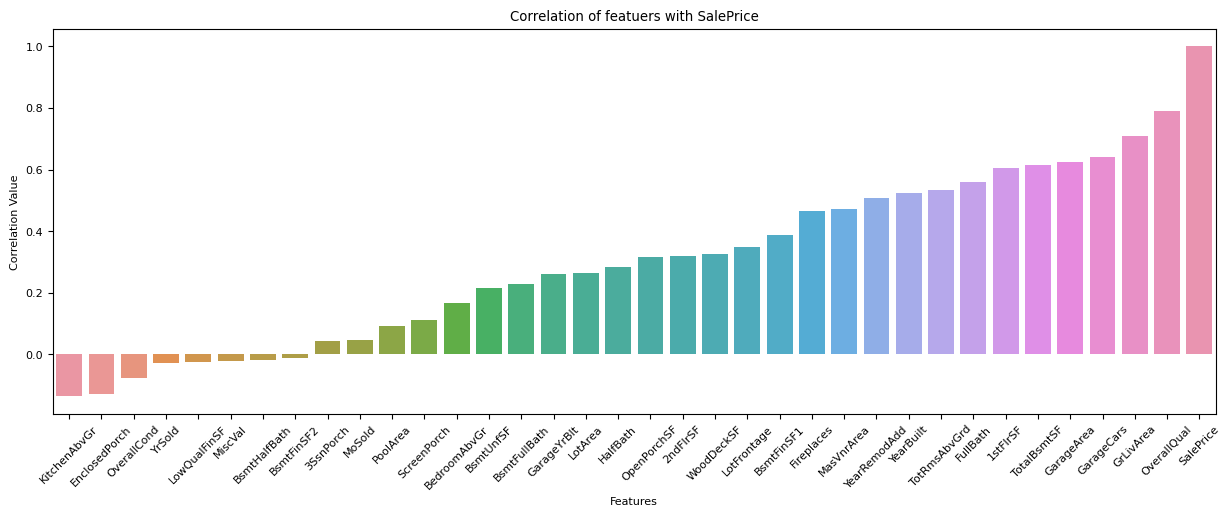

In [27]:
# Plot correlation between features and target
correlation_matrix = train_with_target.corr('pearson')
target_correlation = pd.DataFrame(correlation_matrix.columns,columns=['Feature'])
target_correlation['Corr'] = correlation_matrix['SalePrice'].values
plt.figure(figsize = (15,5))
sns.barplot(x='Feature', y='Corr', data = target_correlation.sort_values(['Corr']))
plt.xticks(rotation=45)
plt.title('Correlation of featuers with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.show()

In [28]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 10))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cut_off = 0.6  # only show cells with abs(correlation) at least this value
    extreme_1 = 0.75  # show with a star
    extreme_2 = 0.85  # show with a second star
    extreme_3 = 0.90  # show with a third star
    mask |= np.abs(corr) < cut_off
    corr = corr[~mask]  # fill in NaN in the non-desired cells

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
        wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        corr = corr.iloc[wanted_cols, wanted_rows]

    annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '**')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '***')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', annot_kws={"fontsize":15})
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20}, pad=16)
    plt.xticks(rotation=90, fontsize=20) 
    plt.yticks(rotation=0, fontsize=20) 
    plt.show()

### Creating new important feature before removing

In [29]:
#Adding one more important feature
#Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house
# Adding total TotalSF feature 
# Since it combines two features into one they will be highly correlated and thus we can remove them
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']
train['TotalSF'] = train['TotalBsmtSF'] + train['GrLivArea']
test['TotalSF'] = test['TotalBsmtSF'] + test['GrLivArea']
train_with_target['TotalSF'] = train_with_target['TotalBsmtSF'] + train_with_target['GrLivArea']

<div class="alert alert-block alert-success">
    Next we present a <b>heatmap</b> showing correlation between the different features including the target. <strong> only high (>0.6)</strong>
</div>

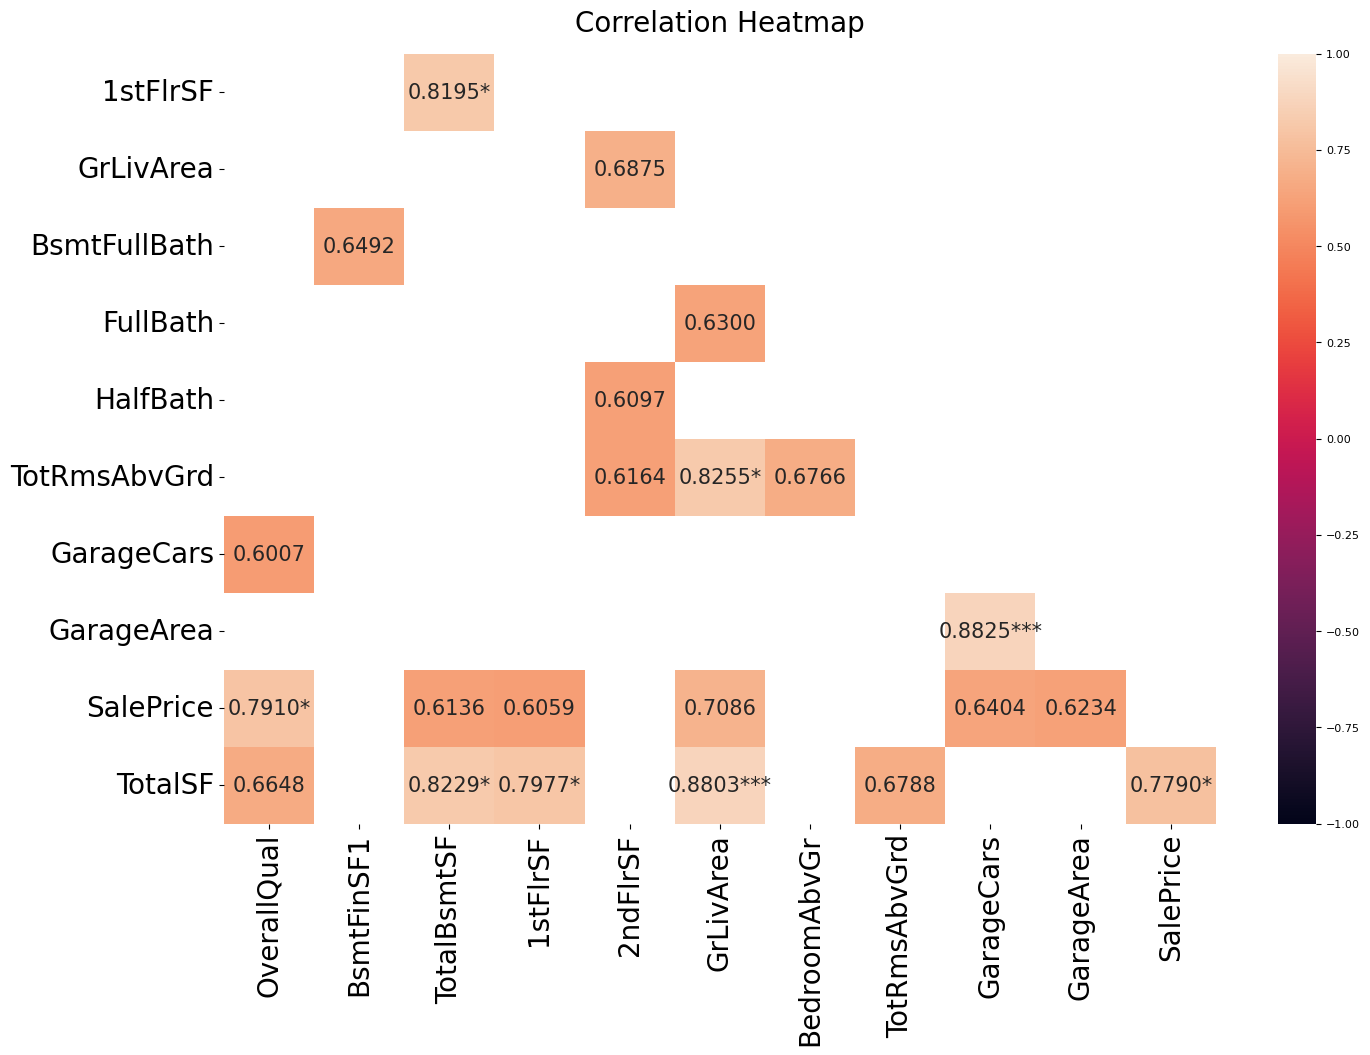

In [30]:
plot_correlation_heatmap(train_with_target)

<div class="alert alert-block alert-success">
From the above map we can recognize some correlative features and consider to remove them <strong>here</strong>
</div>

<div class="alert alert-block alert-success"><B>Whom to remove:</B>
<BR>'GarageCars' and 'GarageArea' are highly  corellated (which makes sense), and they also have a similar corellation to target, but since <b>'GarageCars'</b> has a slight less information (categorical) we shall remove it. 
<BR>Also 'GrLivArea' and 'TotRmsAbvGrd'  are highly  corellated (which also surprisingly makes sense), but since 'GrLivArea' has a a high corellation to target we shall remove <b>'TotRmsAbvGrd'</b>. 
<BR>Same for '1stFlrSF' and 'TotalBsmtSF'. '1stFlrSF' has smaller corellation to target and thus we will remove <b>'1stFlrSF'</b>.
<BR>
<BR> This is a classic example of <b>feature selection in supervised learning</b>. 
<BR> Corellated features is like sampling same information twice, they add no new information and hance it's a good idea to remove them for a better prediction.   
    
</div>.

### Remove corellated features

In [31]:
#TP: Remove corellated features

#TP remove categorial features which are highly correlated with other features

train = train.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea'], axis=1)
train_with_target = train_with_target.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea'], axis=1)
test = test.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea'], axis=1)
all_data = all_data.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea'], axis=1)



In [32]:
print(train.shape, test.shape, train_with_target.shape)

(1460, 75) (1459, 74) (1460, 75)


In [33]:
corr_predictors = ['TotalSF', 'GarageArea', 'OverallQual']
# TotalSF
idxs_TotalSF = list(train[(train['TotalSF']>4000) & (train['SalePrice']<300000)].index)
# 1stFlrSF
idxs_GarageArea = list(train[(train['GarageArea']>1200) & (train_data['SalePrice']<300000)].index)
# OverallQual
#idxs_OverallQual = list(train[(train_data['GarageArea']>1200) & (train_data['SalePrice']<300000)].index)
all_idxs=[idxs_TotalSF, idxs_GarageArea,[0] ,[0]]

In [34]:
# plot_corr_predictors
def plot_corr_predictors(predictor_names):
    plt.figure(figsize=(20,10))
    
    for count, predictor in enumerate(corr_predictors, start=1):
        plt.subplot(2,3,count)
        #main plot
        ax = sns.scatterplot(x = predictor, y = 'SalePrice', data = train, hue='OverallQual', palette= 'YlOrRd')
        #outliers
        #ax = sns.scatterplot(x = train_data[predictor][all_idxs[count-1]], y = train_data['SalePrice'][all_idxs[count-1]])
        plt.title("SalePrice against " + predictor, fontdict={'fontsize': 20})
        
        
        x = mean(train[predictor][all_idxs[count-1]])
        y = mean(train['SalePrice'][all_idxs[count-1]])
        
        ax.annotate('Outliers\n zone', xy=(x-100, y+0), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='baseline',
            bbox=dict(boxstyle='round,pad=0.2', fc='maroon', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

    plt.tight_layout(pad=4.0)
    plt.show()    

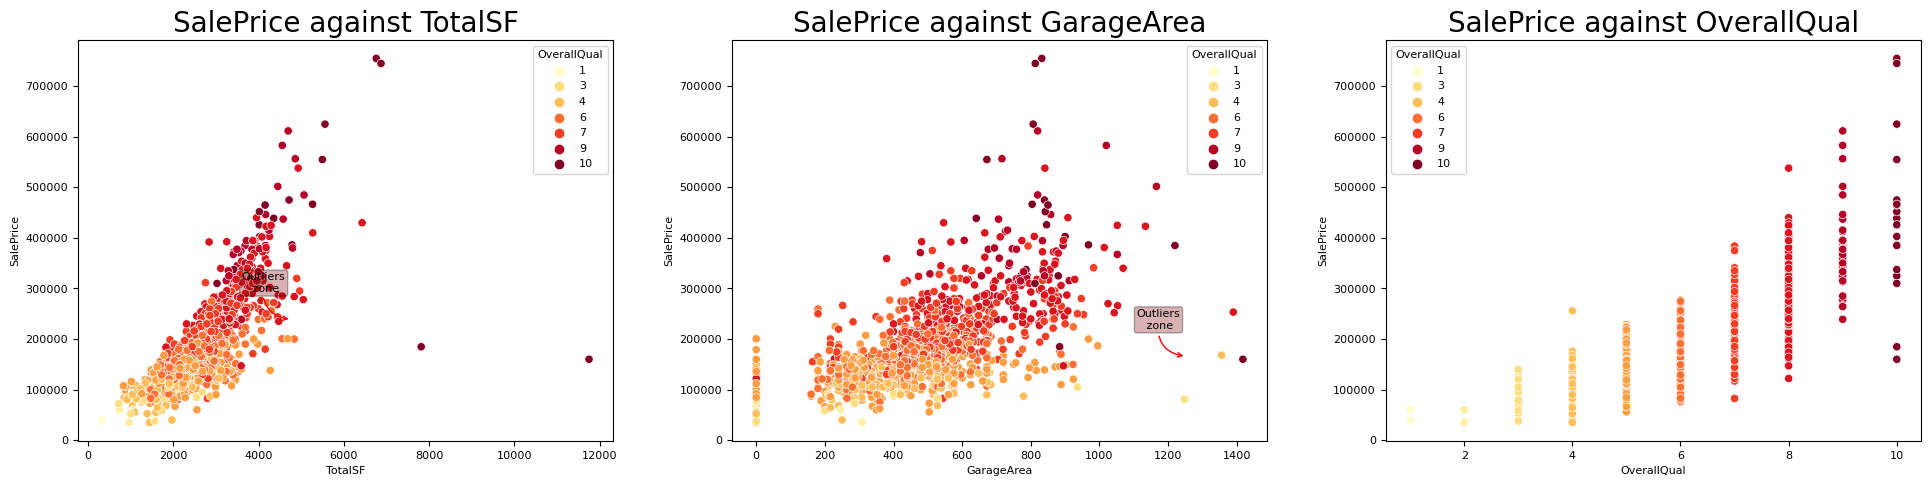

In [35]:
plot_corr_predictors(corr_predictors)

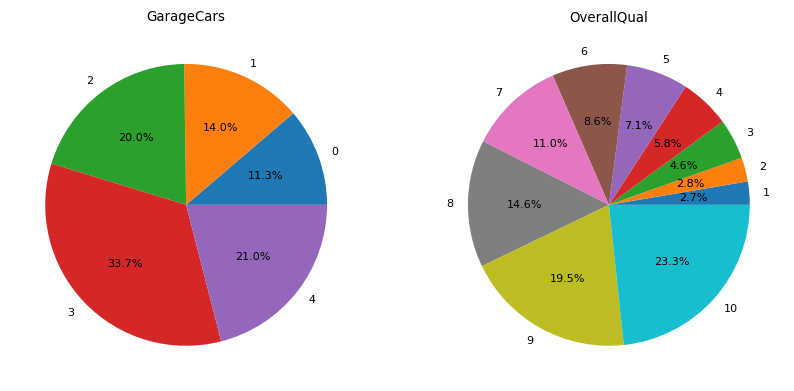

In [36]:
GarageCars_grouped = train_data.groupby('GarageCars')['SalePrice'].mean().reset_index()
OverallQual_grouped = train_data.groupby('OverallQual')['SalePrice'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(GarageCars_grouped['SalePrice'], labels=GarageCars_grouped['GarageCars'], autopct='%1.1f%%')
ax1.set_title('GarageCars')

ax2.pie(OverallQual_grouped['SalePrice'], labels=OverallQual_grouped['OverallQual'], autopct='%1.1f%%')
ax2.set_title('OverallQual')


plt.show()

In [37]:
# plot_bars for corr_predictors
def plot_bars(predictor_names):
    plt.figure(figsize=(20,10))
    
    for count, predictor in enumerate(predictor_names, start=1):
        grouped = train_data.groupby(predictor)['SalePrice'].mean().reset_index()
        plt.subplot(2,3,count)
        ax = sns.barplot(x = grouped[predictor], y = grouped['SalePrice'])
        plt.title(predictor + " VS SalePrice against ", fontdict={'fontsize': 20})

    plt.tight_layout(pad=4.0)
    plt.show()   

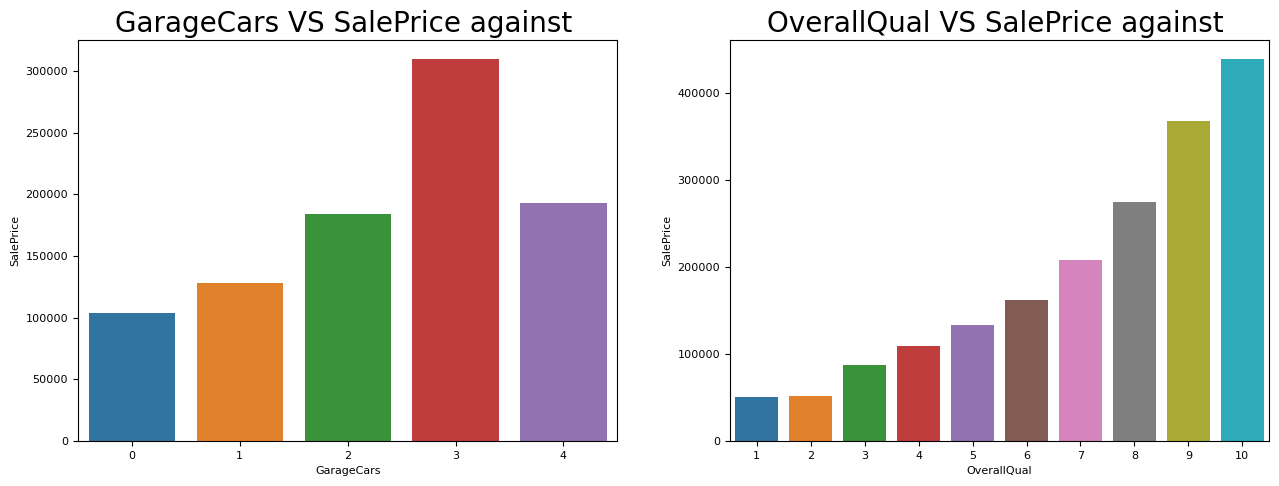

In [38]:
bar_predictors = ['GarageCars', 'OverallQual']
plot_bars(bar_predictors)

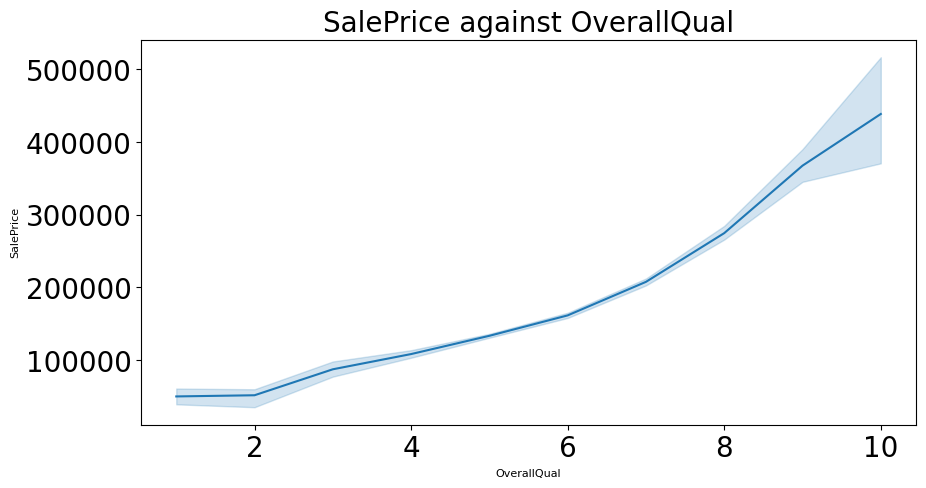

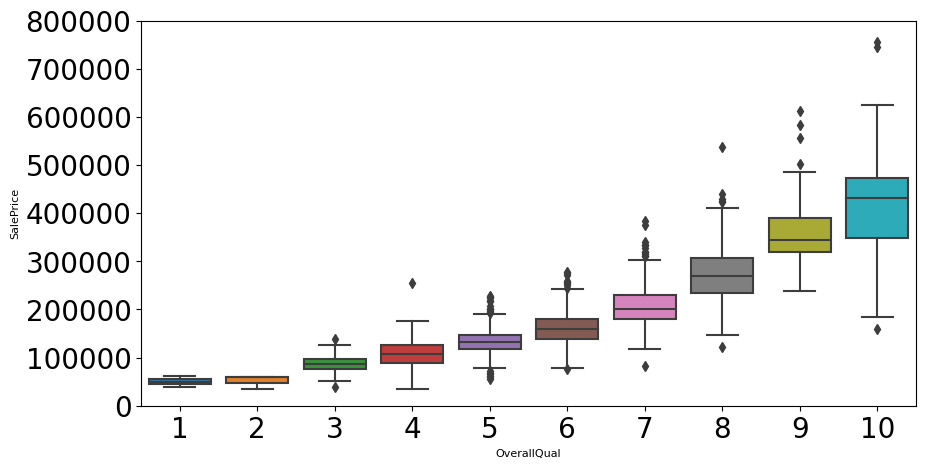

In [39]:
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = 'OverallQual', y = 'SalePrice', data = train_data)
plt.title("SalePrice against OverallQual", fontdict={'fontsize': 20})
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.show()

<div class="alert alert-block alert-success">
In the above section we presented and took care of correllated features, after filling or removing NULL values, we analized and removed some of the unnecessary features.
<BR>We also observed some outliers, which we will treat in the next part.
<BR>Now, lets make some feature transformations and preper data for models.
</div>

<table id=Prepering-Data-for-models style="width:100%">
<tr><td><h1>Prepering Data for models</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

<div class="alert alert-block alert-success">
Feature transformations should be done on all data (training + test), so we will split it later on again
</div>

## Feature Transformations


### Encoding categorical features
One hot encoding

In [40]:
# Transforming some numerical variables that are really categorical

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
#TP: all_data['MoSold'] = all_data['MoSold'].astype(str)

In [41]:
all_data_ohe1 = pd.get_dummies(all_data)
all_data_ohe = all_data_ohe1.copy()
       
print(all_data_ohe.shape)

(2919, 315)


In [42]:
#TP# Label Encoding some categorical variables that may contain information in their ordering set

#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold', 'OverallCond')
## process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(all_data[c].values)) 
#    all_data[c] = lbl.transform(list(all_data[c].values))

## shape        
#print(all_data.shape)

### Log transform skewed features
Models do better with features that are not skewed.
Log transform only features that have abs(skew)>0.5

In [43]:
# Create new DF with numerical features. For each feature calculate the skew and decide if need to
# transform according to abs(skew)>0.5
skew_df = pd.DataFrame(all_data_ohe.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['skew'] = skew_df['Feature'].apply(lambda feature: skew(all_data_ohe[feature]))
skew_df['Absolute skew'] = np.abs(skew_df['skew'])
skew_df['Skewed'] = skew_df['Absolute skew']>=0.5

In [44]:
# Log transform each of the skewed features
for col in skew_df[skew_df['Skewed']==True]['Feature'].values:
        all_data_ohe[col] = np.log1p(all_data_ohe[col])

In [45]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = stats.probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

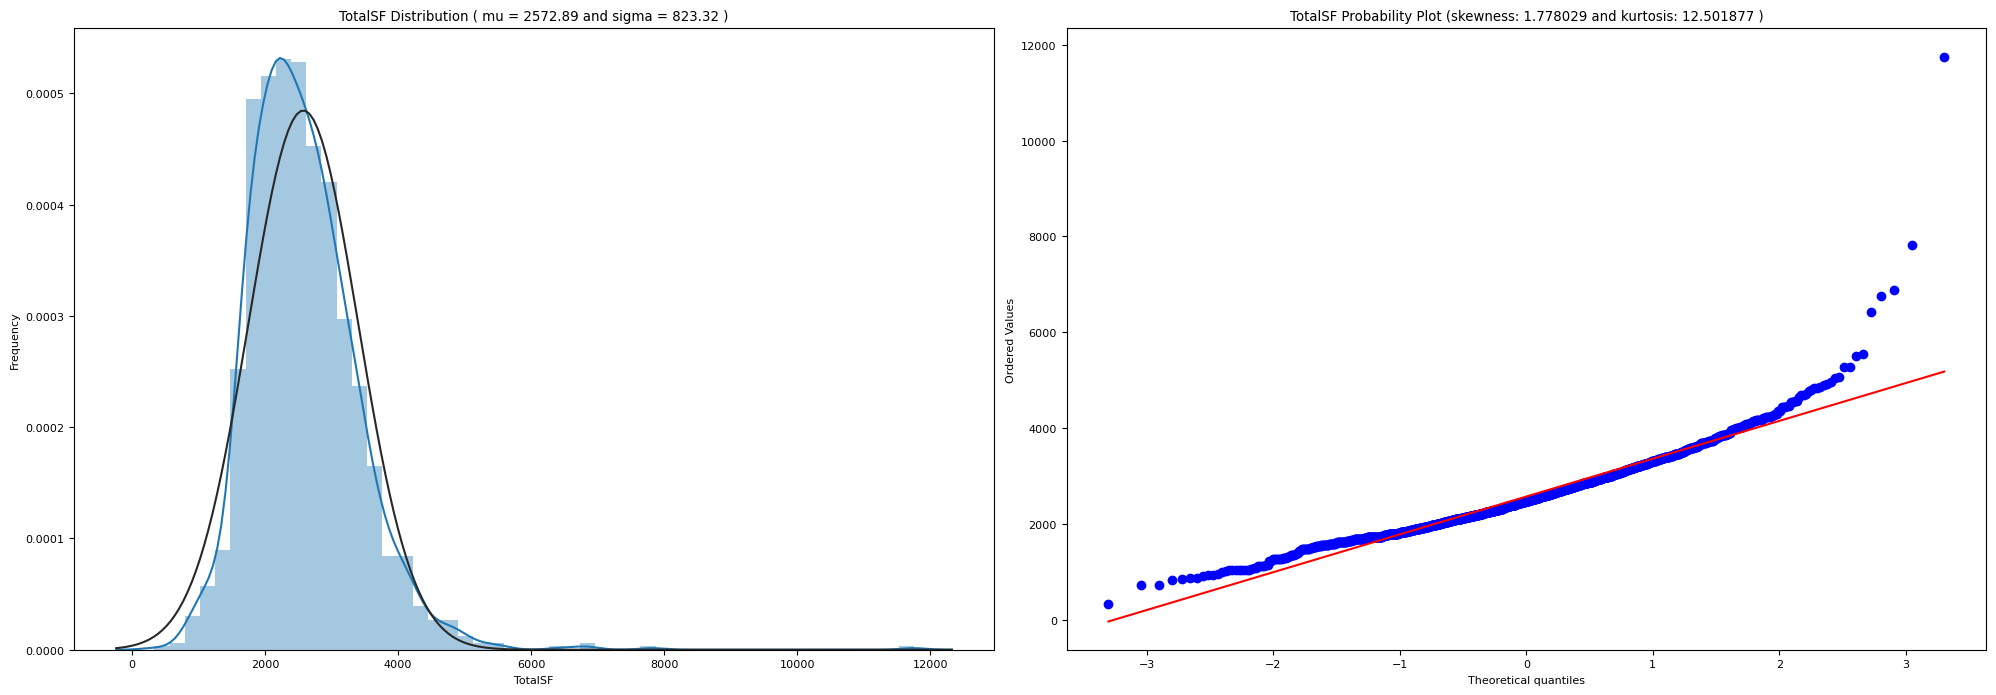

In [46]:
#An example of skewed feature
#Before:
QQ_plot(train['TotalSF'], 'TotalSF')

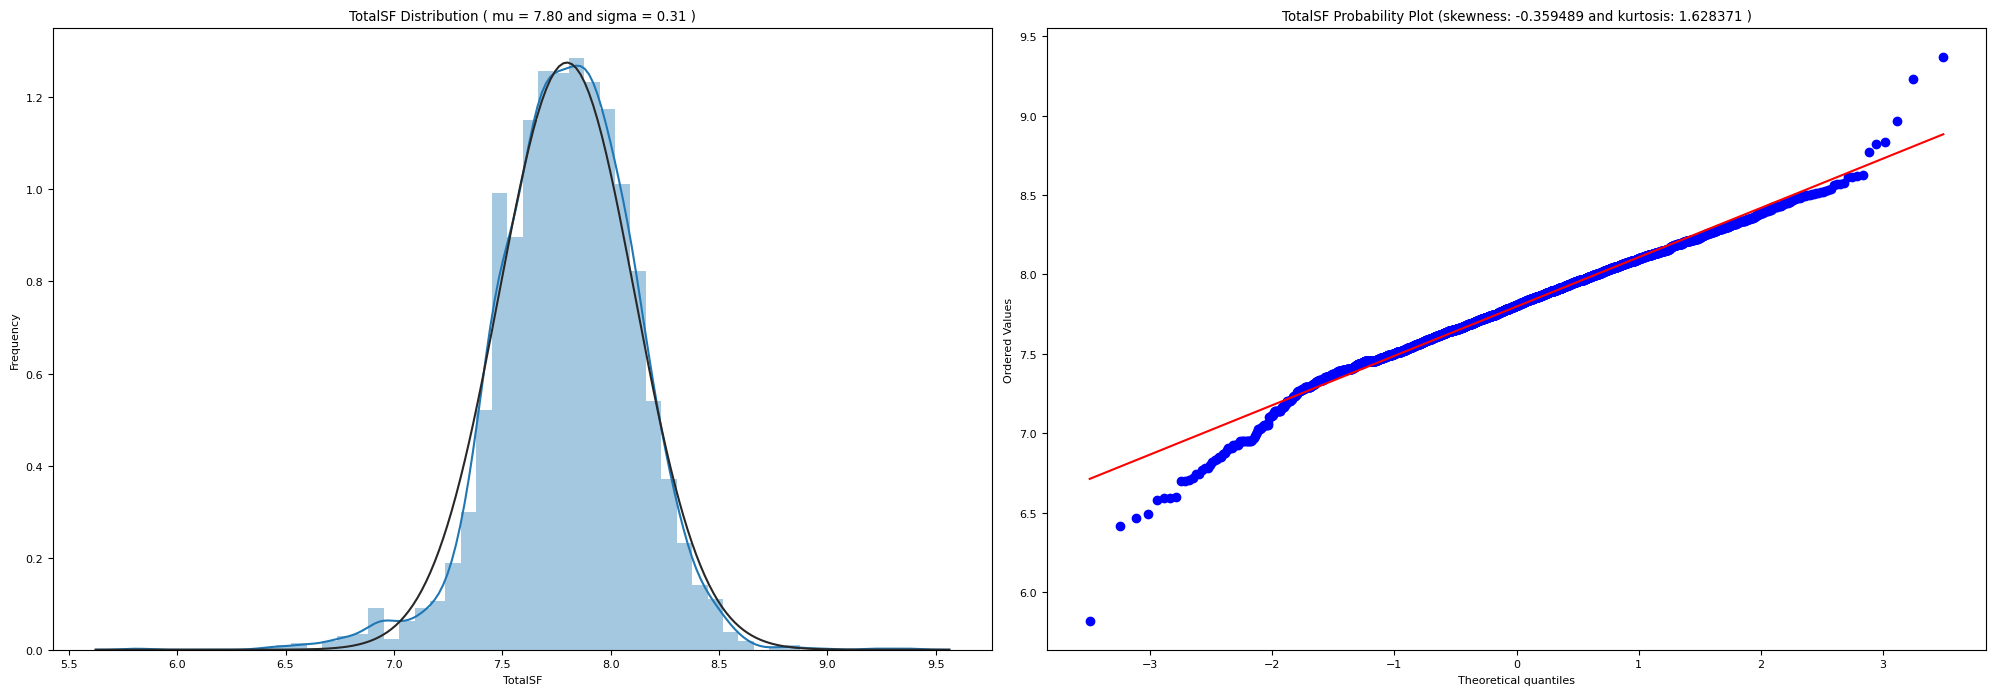

In [47]:
#After:
QQ_plot(all_data_ohe['TotalSF'], 'TotalSF')

### Cosine transform for cyclical features
Use cosine transform so the cyclic feature will be evident in the data

In [48]:
all_data_ohe['MoSold'] = -np.cos(0.5236*all_data_ohe['MoSold'])
all_data_trnfrmd = all_data_ohe.copy()
all_data = all_data_trnfrmd

## Target Transformation
Models do better with labels that are not skewed.

<div class="alert alert-block alert-success">
Next we can see that the SalePrice distribution is skewed (not normally distributed), log of the data looks much better (nearly normal), so we will work with log(SalePrice)
</div>

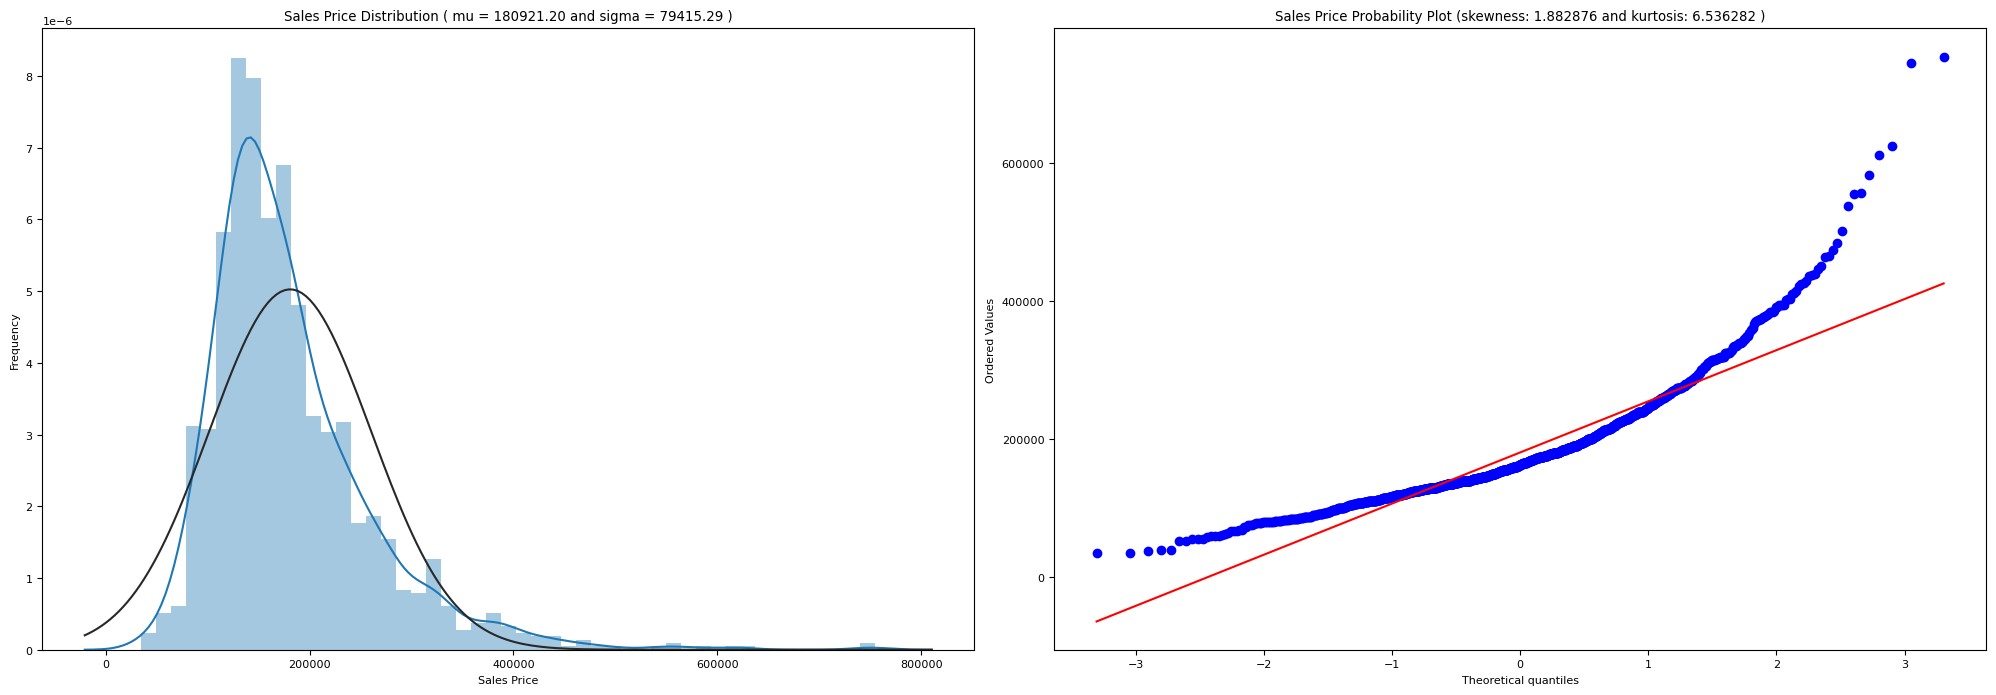

In [49]:
#Before
QQ_plot(target, 'Sales Price')

In [50]:
# The labels for training the models
log_target = np.log(target)

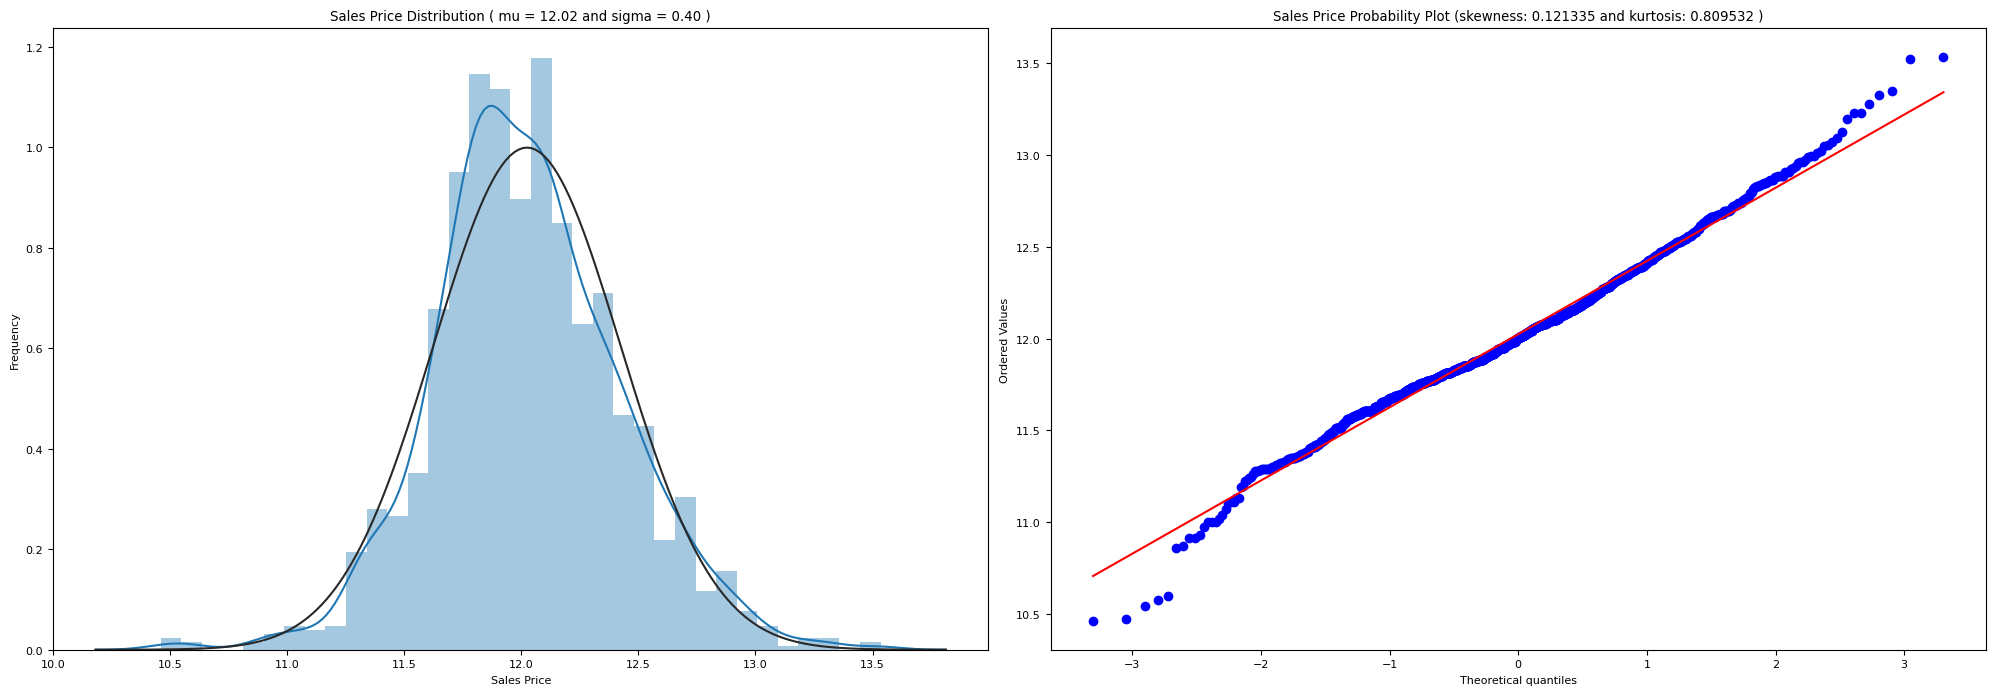

In [51]:
#After
QQ_plot(log_target, 'Sales Price')

<div class="alert alert-block alert-success">
Comment: <strong>competition loss is RMSLE so we need to log-transform y</strong>
</div>

<div class="alert alert-block alert-success">
Now we shall take care of the outliers we saw above
</div>

### Outliers

In [52]:
Outliers = list(set(idxs_TotalSF+idxs_GarageArea))
Outliers

[1024,
 261,
 523,
 529,
 1298,
 1044,
 1173,
 1175,
 1061,
 1190,
 304,
 1328,
 1205,
 961,
 66,
 197,
 70,
 581,
 1223,
 332,
 1250,
 1386,
 621,
 113,
 888,
 635]

<div class="alert alert-block alert-success">
But first, after all data manipulationd, let's split the data back into training and test sets</strong>
</div>

### Splitting the new transformed data

In [53]:
ntest = test_data.shape[0]+1 #number of rows in test data
train = all_data.iloc[:ntest, :]
test = all_data.iloc[ntest:, :]
print(train.shape, test.shape)

(1460, 315) (1459, 315)


In [54]:
train = train.drop(Outliers)
target = target.drop(Outliers)

In [55]:
#TP: #removing 'Id' column which is just the DB table index
#train = train.drop('Id',axis=1) 
#test_Ids = test_data['Id']
#test = test.drop('Id',axis=1) 

In [56]:
feature_names = train.columns

In [57]:
X_train, X_validate, y_train, y_validate = train_test_split(train,target,test_size=0.3,random_state=0)

In [58]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1278,4.330733,9.156306,8,1.791759,7.602401,2002,0.000000,6.690842,0.000000,5.783825,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
911,4.262680,9.136371,5,2.079442,7.589842,1989,0.000000,5.283204,0.000000,6.978214,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
913,4.418841,8.743691,5,1.945910,7.575585,1950,0.000000,5.652489,0.000000,6.576470,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
950,4.110874,8.881975,5,2.197225,7.576097,2002,0.000000,5.988961,5.010635,5.762051,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
409,4.454347,9.287394,8,1.791759,7.604894,2008,4.615121,6.672033,0.000000,5.505332,...,0.0,0.693359,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.693359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,3.496508,8.412055,6,1.791759,7.600402,1998,5.771441,6.765039,0.000000,5.826000,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
847,3.610918,9.650142,5,1.945910,7.587311,1972,0.000000,6.133398,0.000000,6.003887,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
1238,4.158883,9.478304,6,1.791759,7.603898,2005,0.000000,0.000000,0.000000,7.040536,...,0.0,0.000000,0.0,0.693359,0.693359,0.0,0.0,0.0,0.000000,0.000000
568,4.382027,9.419628,8,2.197225,7.592870,2009,0.000000,7.273786,0.000000,4.025352,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000


<table id=-Feature-Selection style="width:100%">
<tr><td><h1>Feature Selection</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

<div class="alert alert-block alert-success"><B>Dimension Reduction:</B>
<BR>With the categorial dummy variables, after removing highly correllated features, we are left with 315 variables
<BR>This is too computationaly expencive for a model. 
<BR>So next we will reduce dimension by <b>shrinkage methods</b> and <b>regulariztaion</b>.
<BR>The methods we will use are
<BR><b>"Ridge"</b> and <b>"Lasso"</b> regression
<BR><b>"Trees"</b>
<BR><b>"Combination of the above"</b>
<BR>And tuning parameters for the penaly and the depth of the tree based on CV
<BR><b>"PCA"</b>

    
    
</div>.

### Ridge

In [59]:
model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', random_state=0))
alpha_space = {'alpha': uniform(0, 1)}
alphas = []
for i in range(30):
    ridge_cv = RandomizedSearchCV(model[1], alpha_space, cv=5)
    ridge_cv.fit(X_train, y_train)
    alphas.append(ridge_cv.best_params_['alpha'])

In [60]:
ridge_best_alpha = np.array(alphas).mean()
ridge_best_alpha

0.5868585066958786

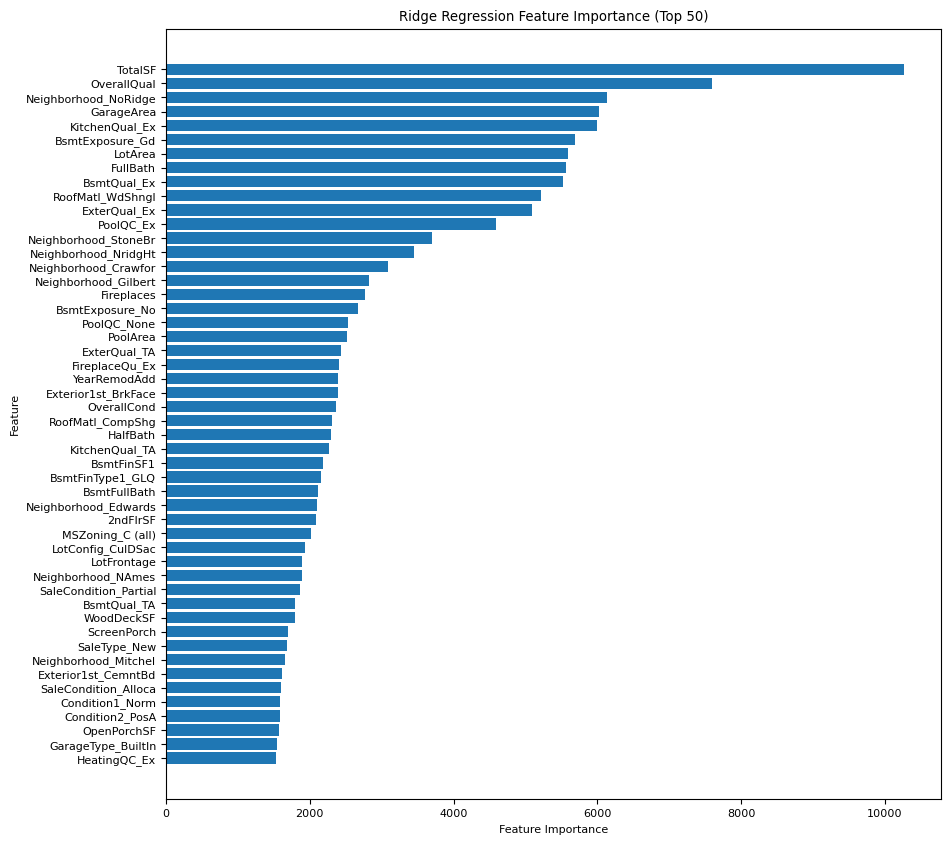

In [61]:
# Train a Ridge Regression model
ridge = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', alpha=ridge_best_alpha, random_state=0))
ridge.fit(X_train, y_train)

# Plot the feature importances
coef = ridge[1].coef_
importance = np.abs(coef)
sorted_idx = np.argsort(importance)[-50:]  # select the top 50 largest coefficients

plt.figure(figsize=(10, 10))  
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Ridge Regression Feature Importance (Top 50)")
plt.show()

In [62]:
ridge_most = np.array(feature_names)[sorted_idx][::-1]
ridge_most

array(['TotalSF', 'OverallQual', 'Neighborhood_NoRidge', 'GarageArea',
       'KitchenQual_Ex', 'BsmtExposure_Gd', 'LotArea', 'FullBath',
       'BsmtQual_Ex', 'RoofMatl_WdShngl', 'ExterQual_Ex', 'PoolQC_Ex',
       'Neighborhood_StoneBr', 'Neighborhood_NridgHt',
       'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Fireplaces',
       'BsmtExposure_No', 'PoolQC_None', 'PoolArea', 'ExterQual_TA',
       'FireplaceQu_Ex', 'YearRemodAdd', 'Exterior1st_BrkFace',
       'OverallCond', 'RoofMatl_CompShg', 'HalfBath', 'KitchenQual_TA',
       'BsmtFinSF1', 'BsmtFinType1_GLQ', 'BsmtFullBath',
       'Neighborhood_Edwards', '2ndFlrSF', 'MSZoning_C (all)',
       'LotConfig_CulDSac', 'LotFrontage', 'Neighborhood_NAmes',
       'SaleCondition_Partial', 'BsmtQual_TA', 'WoodDeckSF',
       'ScreenPorch', 'SaleType_New', 'Neighborhood_Mitchel',
       'Exterior1st_CemntBd', 'SaleCondition_Alloca', 'Condition1_Norm',
       'Condition2_PosA', 'OpenPorchSF', 'GarageType_BuiltIn',
       'HeatingQC_

### Lasso

In [63]:
# find the best alpha penalty for lasso Regression model
model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l1', random_state=0))
alpha_space = {'alpha':uniform(0.01, 0.5)}
alphas = []
for i in range(30):
    lasso_cv = RandomizedSearchCV(model[1], alpha_space, cv=5)
    lasso_cv.fit(X_train, y_train)
    alphas.append(lasso_cv.best_params_['alpha'])

In [64]:
lasso_best_alpha = np.array(alphas).mean()
#lasso_best_alpha = 0.05
lasso_best_alpha

0.3227833572062462

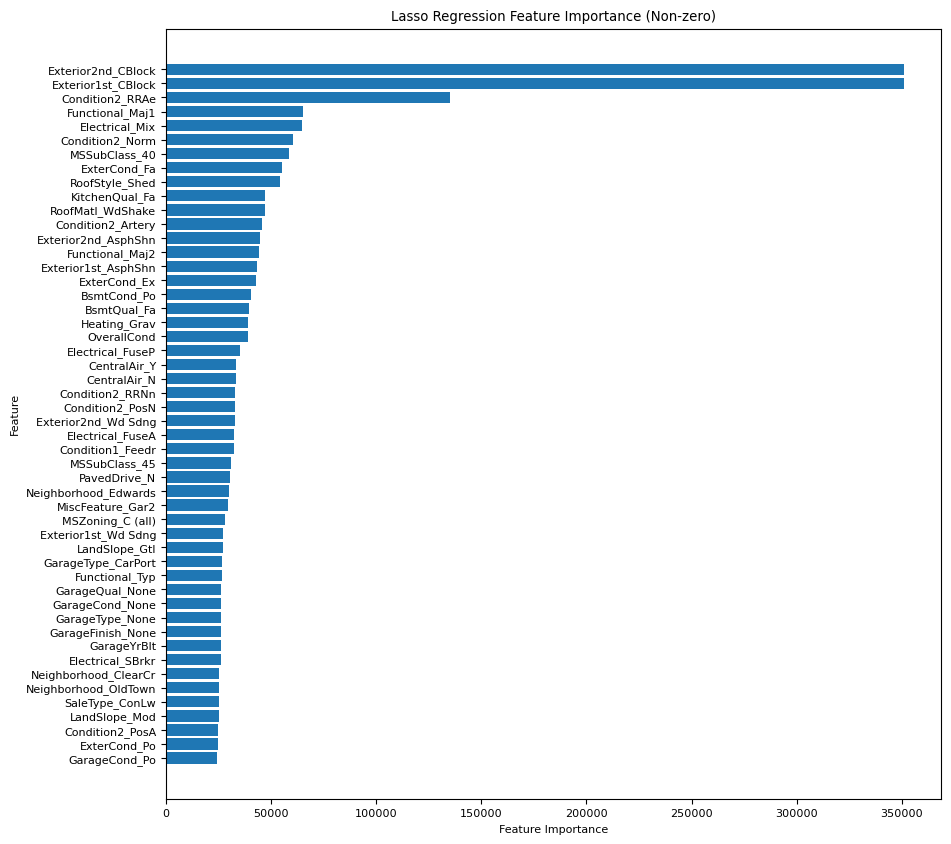

In [65]:
# Train a Lasso Regression model
lasso = make_pipeline(StandardScaler(), SGDRegressor(penalty='l1', alpha=lasso_best_alpha, random_state=0))
lasso.fit(X_train, y_train)

# Plot the feature importances of Lasso
coef = lasso[1].coef_
features = feature_names
importance = np.abs(coef)
nonzero_idx = np.nonzero(coef)
nonzero_importance = importance[nonzero_idx]
nonzero_features = np.array(features)[nonzero_idx]
sorted_idx = np.argsort(nonzero_importance)[-50:]  # select the top 50 largest coefficients different that zero

plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), nonzero_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), nonzero_features[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Lasso Regression Feature Importance (Non-zero)")
plt.show()

In [66]:
lasso_most = np.array(nonzero_features[sorted_idx])[::-1]
lasso_most

array(['Exterior2nd_CBlock', 'Exterior1st_CBlock', 'Condition2_RRAe',
       'Functional_Maj1', 'Electrical_Mix', 'Condition2_Norm',
       'MSSubClass_40', 'ExterCond_Fa', 'RoofStyle_Shed',
       'KitchenQual_Fa', 'RoofMatl_WdShake', 'Condition2_Artery',
       'Exterior2nd_AsphShn', 'Functional_Maj2', 'Exterior1st_AsphShn',
       'ExterCond_Ex', 'BsmtCond_Po', 'BsmtQual_Fa', 'Heating_Grav',
       'OverallCond', 'Electrical_FuseP', 'CentralAir_Y', 'CentralAir_N',
       'Condition2_RRNn', 'Condition2_PosN', 'Exterior2nd_Wd Sdng',
       'Electrical_FuseA', 'Condition1_Feedr', 'MSSubClass_45',
       'PavedDrive_N', 'Neighborhood_Edwards', 'MiscFeature_Gar2',
       'MSZoning_C (all)', 'Exterior1st_Wd Sdng', 'LandSlope_Gtl',
       'GarageType_CarPort', 'Functional_Typ', 'GarageQual_None',
       'GarageCond_None', 'GarageType_None', 'GarageFinish_None',
       'GarageYrBlt', 'Electrical_SBrkr', 'Neighborhood_ClearCr',
       'Neighborhood_OldTown', 'SaleType_ConLw', 'LandSlope_Mod'

### Trees

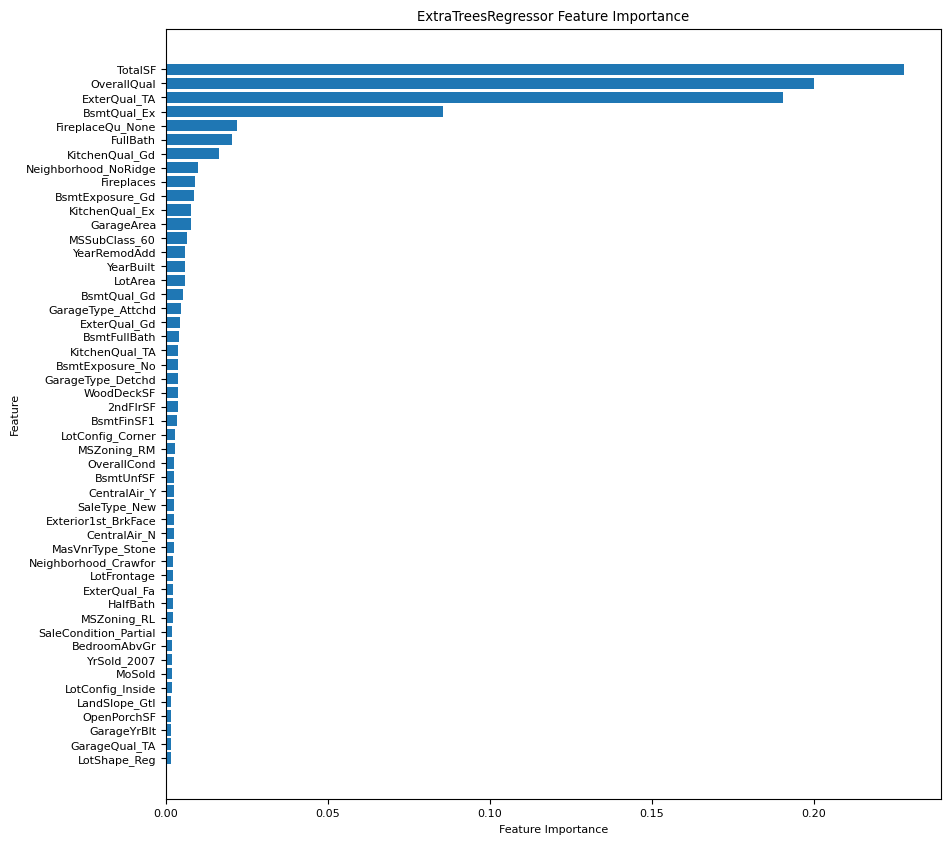

In [67]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
feature_rank = pd.Series(model.feature_importances_, index=feature_names)
top_n = 50
top_n_features = feature_rank.nlargest(top_n)
sorted_idx = top_n_features.index[::-1]  # get indices in descending order

plt.barh(range(len(sorted_idx)), top_n_features[sorted_idx])
plt.yticks(range(len(sorted_idx)), sorted_idx)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("ExtraTreesRegressor Feature Importance")
plt.show()

In [68]:
tree_most = top_n_features[sorted_idx][::-1].index
tree_most

Index(['TotalSF', 'OverallQual', 'ExterQual_TA', 'BsmtQual_Ex',
       'FireplaceQu_None', 'FullBath', 'KitchenQual_Gd',
       'Neighborhood_NoRidge', 'Fireplaces', 'BsmtExposure_Gd',
       'KitchenQual_Ex', 'GarageArea', 'MSSubClass_60', 'YearRemodAdd',
       'YearBuilt', 'LotArea', 'BsmtQual_Gd', 'GarageType_Attchd',
       'ExterQual_Gd', 'BsmtFullBath', 'KitchenQual_TA', 'BsmtExposure_No',
       'GarageType_Detchd', 'WoodDeckSF', '2ndFlrSF', 'BsmtFinSF1',
       'LotConfig_Corner', 'MSZoning_RM', 'OverallCond', 'BsmtUnfSF',
       'CentralAir_Y', 'SaleType_New', 'Exterior1st_BrkFace', 'CentralAir_N',
       'MasVnrType_Stone', 'Neighborhood_Crawfor', 'LotFrontage',
       'ExterQual_Fa', 'HalfBath', 'MSZoning_RL', 'SaleCondition_Partial',
       'BedroomAbvGr', 'YrSold_2007', 'MoSold', 'LotConfig_Inside',
       'LandSlope_Gtl', 'OpenPorchSF', 'GarageYrBlt', 'GarageQual_TA',
       'LotShape_Reg'],
      dtype='object')

## PCA

In [69]:
scale = RobustScaler() 
df = scale.fit_transform(X_train)

pca = PCA().fit(df) 
print('With only 50 features: {:6.4%}'.format(sum(pca.explained_variance_ratio_[:50])),"%\n")


With only 50 features: 99.9551% %



## All together

In [82]:
most_features = pd.Series(list(set(ridge_most) & set(lasso_most) & set(tree_most)))
most_features

0    OverallCond
dtype: object

In [81]:
X_train = X_train[most_features]

KeyError: "['OpenPorchSF', 'KitchenQual_Ex', 'LotArea', 'HalfBath', 'KitchenQual_TA', 'FullBath', 'BsmtFullBath', 'BsmtExposure_No', 'LotFrontage', 'ExterQual_TA', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'SaleType_New', 'BsmtExposure_Gd', 'WoodDeckSF', 'BsmtQual_Ex', 'Exterior1st_BrkFace', 'TotalSF', 'SaleCondition_Partial', '2ndFlrSF', 'Neighborhood_NoRidge', 'OverallQual', 'Neighborhood_Crawfor', 'GarageArea'] not in index"

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

<table id=SGD-Model style="width:100%">
<tr><td><h1>SGD Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
<td><h2>Using Ridge, Lasso, and Elasticnet regulariztions</h2></td><td></td>
</table>

### SGD - Tune Hyper Parameters

In [72]:
# Define the parameter distribution for random search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5],
}

# Create an instance of the SGDRegressor class
sgd = make_pipeline(StandardScaler(), SGDRegressor())

# Run the random search with 5-fold cross-validation   
random_search = RandomizedSearchCV(sgd[1], param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'penalty': 'elasticnet', 'alpha': 5}


In [73]:
sgd = make_pipeline(StandardScaler(), SGDRegressor(penalty= 'l1', max_iter= 1000, alpha= 0.10))
scores = cross_val_score(sgd, X_train, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")


-0.018 (+/- 0.022)


### SGD - Evaluating on Validation set

In [74]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, X_validate, y_validate, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [75]:
rmsle_cv(sgd)

array([29141.85765338, 37795.73925098, 32552.03503476, 41262.82525441,
       30259.02886901])

### SGD - Model Submission 

In [76]:
def Submission(name, model):
    model.fit(train, target)
    predictions = np.exp(model.predict(test))
    output = pd.DataFrame({'Id': test_Ids, 'SalePrice': predictions})
    file_name = name + '_submission.csv'
    output.to_csv(file_name, index=False)
    return predictions

In [77]:
pred = Submission('sgd', sgd)

NameError: name 'test_Ids' is not defined

In [ ]:
sns.histplot(pred)

In [ ]:
sns.histplot(pred1)

<table id=Random-Forest-Model style="width:100%">
<tr><td><h1>Random Forest Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### RF - Tune Hyper Parameters

### RF - Evaluating on Validation set

### RF - Model Submission

<table id=lin-reg style="width:100%">
<tr><td><h1>Support Vector Regression</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
<td><h2>Using PCA</h2></td><td></td>
</table>

In [ ]:
# Define the pipeline
SVR_PCA = make_pipeline(RobustScaler(), PCA(n_components=2), SVR())

scores = cross_val_score(SVR_PCA, X_train, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")

### SVR - Tune Hyperparameters

In [ ]:
# Define the hyperparameter space
hyperparameters = {
    'pca__n_components': range(3, 11),
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': uniform(loc=0, scale=100),
    'svr__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=10).rvs(10))
}

# Define the randomized search with cross-validation
random_search = RandomizedSearchCV(
    SVR_PCA, 
    hyperparameters, 
    n_iter=20, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)

# Fit the randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

### LR - Evaluating on Validation set 

### LR - Submission

<table id=Ensemble-of-the-Models style="width:100%">
<tr><td><h1>Ensemble of the Models</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Create Ensemble

### Evaluating on Validation set

<table id=Final-Submission style="width:100%">
<tr><td><h1>Final Submission</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

<table id=Conclusions style="width:100%">
<tr><td><h1>Conclusions</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

- improving modules
- learned from others
- tip of the iceberg


<table id=References style="width:100%">
<tr><td><h1>References</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

Main:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


PCA:

https://www.kaggle.com/code/mgmarques/houses-prices-complete-solution


https://www.kaggle.com/code/massquantity/all-you-need-is-pca-lb-0-11421-top-4

https://www.kaggle.com/code/willkoehrsen/introduction-to-feature-selection

preprocessing, , heatmap, PCA, submission:
https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices

Ensemble:
https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition


https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

submission example: 
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

Missing Data refference from: 
https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

heatmap:
https://stackoverflow.com/questions/66171071/how-to-restrict-a-correlation-heatmap-to-interesting-cells-and-add-stars-to-mark

https://stackoverflow.com/questions/71350386/how-to-change-the-font-labels-of-heatmap

outliers:
https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff

https://chat.openai.com/chat

https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

https://realpython.com/python-enumerate/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

https://matplotlib.org/stable/gallery/color/named_colors.html

https://stackoverflow.com/questions/9074996/how-to-annotate-point-on-a-scatter-automatically-placed-arrow

https://www.w3schools.com/


https://unicode.org/emoji/charts/full-emoji-list.html